# 환경 테스트

In [1]:
import os

# Scientific computation
import numpy as np
import scipy as sp
import pandas as pd
import xgboost as xgb

# Deep learning
import tensorflow as tf
import tensorflow.keras as keras

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import bokeh
import folium
import graphviz
import pydot

# Font detection
import matplotlib.font_manager as fm
from fontTools.ttLib import TTFont
fm._rebuild()

# Eye candy
from tqdm import tqdm

for m in [np, sp, pd, xgb, tf, keras, mpl, bokeh, folium, graphviz, pydot]:
    print(f'{m.__name__}: {m.__version__}')

print(f"Current Environment: {os.environ['CONDA_DEFAULT_ENV']}")
assert(os.environ['CONDA_DEFAULT_ENV'] == 'nims-academy')

numpy: 1.15.4
scipy: 1.1.0
pandas: 0.23.4
xgboost: 0.80
tensorflow: 1.12.0
tensorflow.keras: 2.1.6-tf
matplotlib: 3.0.2
bokeh: 1.0.2
folium: 0.7.0
graphviz: 0.8.4
pydot: 1.3.0
Current Environment: icim-academy


Current Environment가 "base"로 나오고 실행이 멈추는 경우 Anaconda Navigator에서 nims-academy를 선택하지 않았거나, 터미널에서 "conda activate nims-academy"를 실행하지 않아 nims-academy가 아닌 기본 환경에서 실행 중이므로 종료하고 다시 실행합니다.

현재 환경에 대한 더 자세한 내용은 `!conda info`를 실행하면 볼 수 있습니다.

## Matplotlib 한글 출력 테스트

In [2]:
def is_char_in_font(c, font):
    for cmap in TTFont(font.fname)['cmap'].tables:
        if cmap.isUnicode() and ord(c) in cmap.cmap:
            return True

valid_font_set = set()
for font in tqdm(fm.fontManager.ttflist):
    if (is_char_in_font('한', font) 
            and is_char_in_font('a', font)
            and is_char_in_font('0', font)
           ):
        valid_font_set.add(font.name)
print(valid_font_set)

100%|███████████████████████████████████████████████████████████████████████████████| 416/416 [00:13<00:00, 15.68it/s]


{'KBIZgo R', 'HYShortSamul-Medium', 'HYGothic-Medium', 'HCR Dotum', 'Headline R', 'NanumSquareOTF', 'Magic R', 'KBIZmjo B', 'KBIZgo B', 'HYMyeongJo-Extra', 'HYPost-Light', 'HYGothic-Extra', 'KBIZmjo R', 'KBIZgo M', 'HCR Batang', 'KBIZmjo M', 'Pyunji R', 'HYPost-Medium', 'HYPMokGak-Bold', 'SpoqaHanSans', 'New Gulim', 'Yet R', 'Malgun Gothic', 'HYHeadLine-Medium', 'HYSinMyeongJo-Medium', 'Ami R', 'HYGungSo-Bold', 'D2Coding ligature', 'HYGraphic-Medium', 'BM JUA_TTF'}


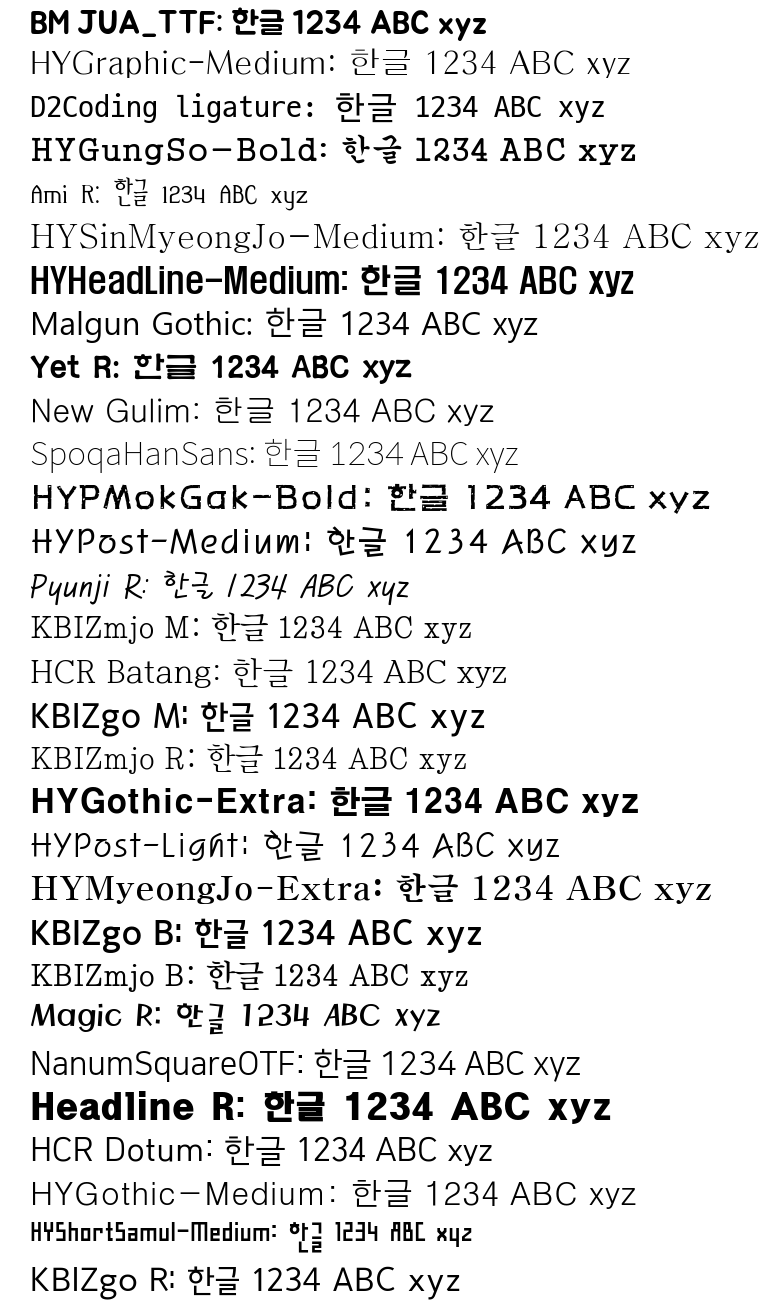

In [3]:
fig, ax = plt.subplots()
for i, fontname in enumerate(valid_font_set):
    ax.axis('off')
    ax.text(
        0, i / 5, f'{fontname}: 한글 1234 ABC xyz',
        fontname=fontname,
        fontsize=32,
    )

아래 셀의 `Malgun Gothic` 자리에, 위 리스트 중 원하는 글꼴 이름을 골라서 넣고, 제대로 출력되는지 확인합니다.

Windows는 `Malgun Gothic`, Mac은 `AppleGothic`(띄어쓰기 없음) 글꼴은 기본적으로 포함하고 있는 경우가 많습니다.

Text(0.5, 0.3, '수식: $\\int_0^{\\infty}\\frac{1}{x^2}$')

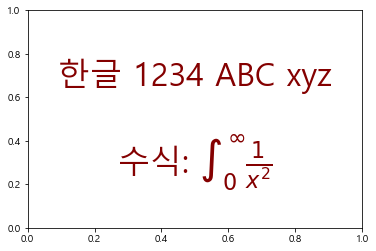

In [4]:
mpl.rc('font', family='Malgun Gothic')

fig, ax = plt.subplots()
ax.text(
    0.5, 0.7, '한글 1234 ABC xyz',
    fontsize='32',
    horizontalalignment='center',
    verticalalignment='center',
    color='xkcd:dark red',
)
ax.text(
    0.5, 0.3, r'수식: $\int_0^{\infty}\frac{1}{x^2}$',
    fontsize='32',
    horizontalalignment='center',
    verticalalignment='center',
    color='xkcd:dark red',
)

한글이 잘 보인다면, 앞으로 다른 notebook에서는 `import matplotlib as mpl`과 `mpl.rc('font', family='...')` 부분만 넣으면 한글 출력이 가능합니다.

## 패키지 테스트

### Folium

In [5]:
import folium
folium.Map(location=(37.292137, 127.017182), zoom_start=18)

### Tensorflow

(60000, 28, 28)


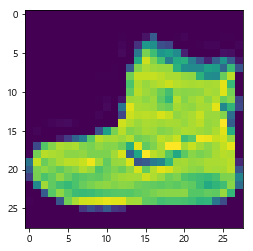

In [6]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print(X_train.shape)
fig, ax = plt.subplots()
ax.imshow(X_train[0])

## References

Unicode fonts:

- https://jdhao.github.io/2018/04/08/matplotlib-unicode-character/
- https://stackoverflow.com/questions/43834362/python-unicode-rendering-how-to-know-if-a-unicode-character-is-missing-from-the
- https://unix.stackexchange.com/questions/247108/how-to-find-out-which-unicode-codepoints-are-defined-in-a-ttf-file
- https://matplotlib.org/_modules/matplotlib/font_manager.html
- https://matplotlib.org/api/font_manager_api.html